<a href="https://colab.research.google.com/github/victoriaPaez/MujeresDigitales2021/blob/main/DTaller_semana_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESARROLLO TALLER 8 DATA-SCIENCE
# ANDREA VICTORIA PAEZ VARGAS - G1


# ¿Cómo podemos optimizar nuestras ventas de productos financieros?


## Introduccion 

**Contexto de negocio.** Es analista de datos en una gran empresa de servicios financieros que vende una cartera diversa de productos. Para realizar estas ventas, la firma cuenta con un centro de llamadas donde los agentes de ventas hacen llamadas tanto a los clientes actuales como a los potenciales. A la empresa le gustaría que se sumergiera en sus datos para diseñar estrategias para aumentar sus ingresos o reducir sus costos. Específicamente, les gustaría duplicar sus clientes más confiables y eliminar a los agentes de ventas que no están produciendo resultados.

**Problema de negocio.** La empresa desea responder a las siguientes preguntas: **"¿Qué tipo de clientes son más probable que compren nuestro producto? ¿Y cuáles de mis agentes de ventas son los más/menos productivos?**


**Contexto analitico.** Los datos se dividen en 3 tablas: "Agentes", "Llamadas" y "Clientes", que se encuentran en archivos CSV. Sin embargo, a diferencia de los casos anteriores, primero leeremos estos archivos CSV en una base de datos SQLite creada dentro de Python. Aprenderá en qué se diferencia esta base de datos de los archivos CSV y cómo interactuar con ella utilizando SQL para extraer información útil.



In [1]:
import pandas as pd
from sqlalchemy import create_engine, text

#Maximo numero de filas a desplegar
pd.options.display.max_rows = 25

engine=create_engine('sqlite://')
df = pd.read_csv('customer.csv').to_sql('customer', engine, if_exists='replace', index=False)
df = pd.read_csv('call.csv').to_sql('call', engine, if_exists='replace', index=False)
df = pd.read_csv('agent.csv').to_sql('agent', engine, if_exists='replace', index=False)

In [2]:
def runQuery(sql):
    resultado = engine.connect().execute((text(sql)))
    return pd.DataFrame(resultado.fetchall(), columns=resultado.keys())

Las columnas en cada una de las tablas se explican a continuacion:

**agent.csv**:
- **AgentID**: the primary key of the table (more on this below)
- **Name**: the name of the agent

**call.csv**:
- **CallID**: the primary key of the table
- **AgentID**: a foreign key (more on this below) to the agents table of the agent who made the call
- **CustomerID**: a foreign key to the customers table of the customer who is being called
- **PickedUp**: a Boolean that is 1 if the customer picked up and 0 if they did not
- **Duration**: integer of the duration of the call
- **ProductSold**: a Boolean that is 1 if the agent made a sale and 0 if they did not

**customer.csv**:
- **CustomerID**: the primary key of the table
- **Name**: the name of the customer
- **Occupation**: the occupation of the customer. 'Unemployed' if no occupation
- **Email**: the email of the customer
- **Company**: the company that the customer works for
- **PhoneNumber**: the phone number of the customer
- **Age**: the age of the customer


La estructura de la base de datos anterior se puede visualizar como se muestra a continuación. Esto se llama **Diagrama de relación de entidades (ER)**, que denota las tablas presentes en la base de datos, las columnas en las tablas y las relaciones entre las tablas:
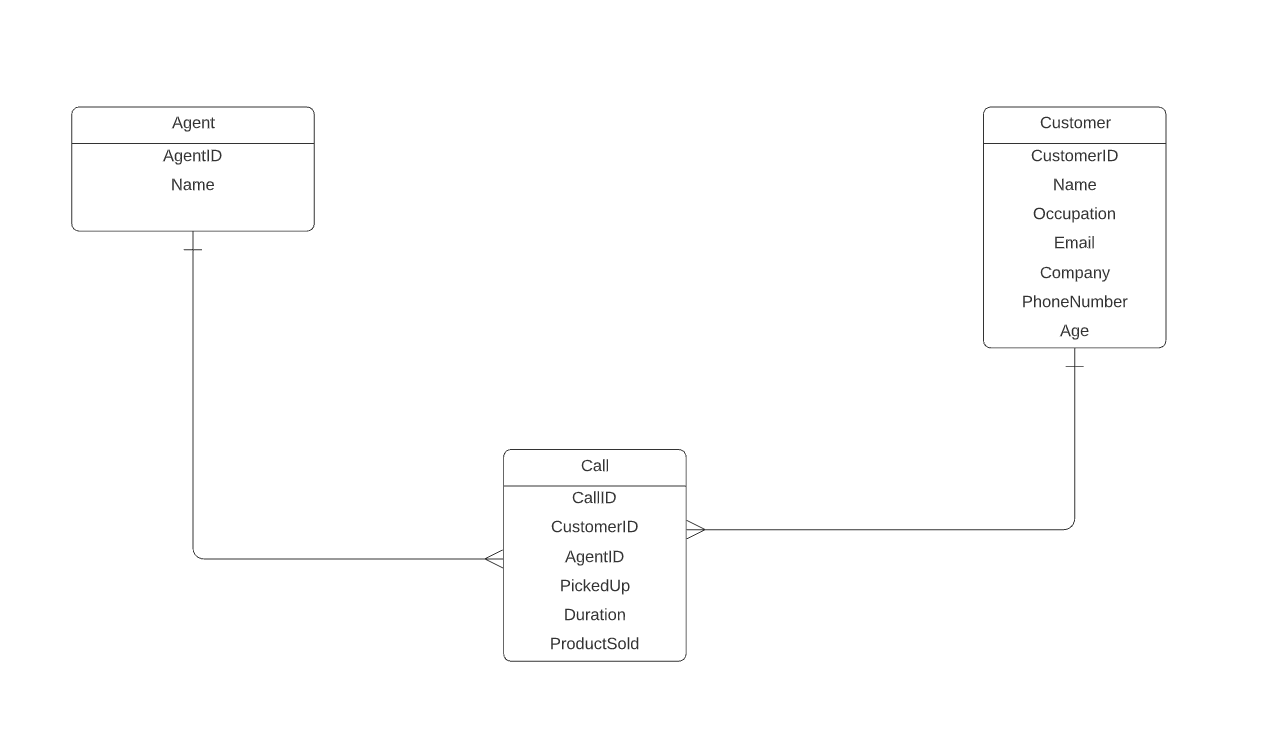

El diagrama anterior ofrece una buena descripción general de cómo está estructurado el esquema y cómo se interconectan los datos.



In [3]:
df_customer =runQuery('SELECT *FROM customer')
df_customer.head(5)

,CustomerID,Name,Occupation,Email,Company,PhoneNumber,Age
0,0,David Melton,Unemployed,DMelton@zoho.com,"Morris, Winters and Ramirez",409-093-0748,16
1,1,Michael Gonzalez,Student,Gonzalez_Michael@yahoo.com,Hernandez and Sons,231-845-0673,19
2,2,Amanda Wilson,Student,Amanda.Wilson75@verizon.com,"Mooney, West and Hansen",844-276-4552,18
3,3,Robert Thomas,"Engineer, structural",RThomas@xfinity.com,Johnson-Gordon,410-404-8000,25
4,4,Eddie Hall,Surgeon,EddieHall@outlook.com,Dawson LLC,872-287-2196,30


In [4]:
df_call =runQuery('SELECT *FROM call')
df_call.head(5)

,CallID,AgentID,CustomerID,PickedUp,Duration,ProductSold
0,0,10,179,0,0,0
1,1,5,691,1,116,0
2,2,10,80,1,165,0
3,3,6,629,1,128,0
4,4,8,318,1,205,0


## Ejercicio 1:

Escriba una consulta en SQL que permita visualizar el nombre de los clientes, la edad y se cree la columna "RangoEdad", en donde se clasifiquen los clientes entre 0-20, 21-30, 31-40, mayores de 40 y "Missing Data", para los que no tengan edad.
Consejo: use la clausula CASE para realizar esta clasificación.

In [5]:
# Escriba su código aquí
queryC = """SELECT Name,Age,
    CASE
        WHEN Age >=  0 AND Age <= 20 THEN 'Edad entre 0 y 20 años'
        WHEN Age >=  21 AND Age <=30 THEN 'Edad entre 21 y 30 años'
        WHEN Age >=  31 AND Age <=40 THEN 'Edad entre 31 y 40 años'
        WHEN Age >=  41 THEN 'Edad mayores de 40 años'
        ELSE 'Missing Data'
    END AS age_range
FROM Customer
ORDER BY age_range ASC"""



In [6]:
df_AgeRange= runQuery(queryC)
df_AgeRange

,Name,Age,age_range
0,David Melton,16,Edad entre 0 y 20 años
1,Michael Gonzalez,19,Edad entre 0 y 20 años
2,Amanda Wilson,18,Edad entre 0 y 20 años
3,Charles Cruz DDS,16,Edad entre 0 y 20 años
4,Travis Jensen,13,Edad entre 0 y 20 años
...,...,...,...
995,Brent Romero,-5,Missing Data
996,Madison Powell,-12,Missing Data
997,Alexis Hart,-1,Missing Data
998,Charles Ross,-1,Missing Data


## Ejercicio 2:

Calcule el número de ventas y el promedio del tiempo de llamada agrupado por la ocupación de los clientes, y excluya aquellos clientes que están desempleados ("Unemployed"), adicionalmente ordene los resultados por número de ventas de forma descendente.

In [7]:
queryVP ="""SELECT Cu.Occupation AS Ocupacion,  AVG(Duration) AS promedio_tiempo_llamada, SUM(ProductSold) AS Numero_De_Ventas	
FROM Call AS C
JOIN customer AS Cu ON C.CustomerID = Cu.CustomerID
WHERE Cu.Occupation <> "Unemployed"
GROUP BY Occupation
ORDER BY SUM(ProductSold)	DESC"""


In [8]:
df_tablasJoin= runQuery(queryVP)
df_tablasJoin.head(25)

,Ocupacion,promedio_tiempo_llamada,Numero_De_Ventas
0,Student,124.235756,303
1,Chemical engineer,125.196629,241
2,"Engineer, water",126.772059,38
3,"Engineer, technical sales",132.814815,36
4,Editor,122.052174,32
5,Orthoptist,120.639706,32
6,Solicitor,121.583333,32
7,Police officer,125.414815,31
8,Games developer,137.348993,30
9,Dentist,119.297101,28


## Ejercicio 3:

Use el rango de edad del ejercicio 1 para calcular el número de clientes y de ventas por cada grupo demográfico, edad entre 0-20; 21-30; 31-40; y mayores de 40, y ordene los resultados por número de ventas de forma ascendente.

# calculamos No de Clientes por cada grupo demográfico

In [9]:
queryA = """SELECT COUNT(Cu.Age) AS No_Clientes, 
    CASE
        WHEN Age >=  0 AND Age <= 20 THEN 'Edad entre 0 y 20 años'
        WHEN Age >=  21 AND Age <=30 THEN 'Edad entre 21 y 30 años'
        WHEN Age >=  31 AND Age <=40 THEN 'Edad entre 31 y 40 años'
        WHEN Age >=  41 THEN 'Edad mayores de 40 años'
        ELSE 'Missing Data'
    END AS age_range
FROM Customer AS Cu
GROUP BY age_range
ORDER BY age_range ASC"""


In [10]:
df_age=runQuery(queryA)
df_age.head()

,No_Clientes,age_range
0,355,Edad entre 0 y 20 años
1,364,Edad entre 21 y 30 años
2,217,Edad entre 31 y 40 años
3,57,Edad mayores de 40 años
4,7,Missing Data


# Calculamos el No de Ventas por cada grupo demográfico.

In [11]:
queryB ="""SELECT SUM(ProductSold) AS No_Ventas,
    CASE
        WHEN Age >=  0 AND Age <= 20 THEN 'Edad entre 0 y 20 años'
        WHEN Age >=  21 AND Age <=30 THEN 'Edad entre 21 y 30 años'
        WHEN Age >=  31 AND Age <=40 THEN 'Edad entre 31 y 40 años'
        WHEN Age >=  41 THEN 'Edad mayores de 40 años'
        ELSE 'Missing Data'
    END AS age_range
FROM Call AS C
JOIN customer AS Cu ON C.CustomerID = Cu.CustomerID
GROUP BY age_range
ORDER BY age_range ASC"""

In [12]:
df1_age=runQuery(queryB)
df1_age.head()

,No_Ventas,age_range
0,707,Edad entre 0 y 20 años
1,760,Edad entre 21 y 30 años
2,469,Edad entre 31 y 40 años
3,132,Edad mayores de 40 años
4,16,Missing Data


# Mostramos el número de clientes y de ventas por cada grupo demográfico , y se ordena por número de ventas de forma ascendente.

In [13]:
result=pd.merge(df_age,df1_age[['No_Ventas','age_range']],how="left")
result=result[['age_range','No_Clientes','No_Ventas']]
result = result.sort_values('No_Clientes',ascending=False)
result

,age_range,No_Clientes,No_Ventas
1,Edad entre 21 y 30 años,364,760
0,Edad entre 0 y 20 años,355,707
2,Edad entre 31 y 40 años,217,469
3,Edad mayores de 40 años,57,132
4,Missing Data,7,16
